# 任务介绍

## 数据集

银行营销数据集

### 背景介绍

金融机构为了在下一次营销活动寻找最佳的改进策略，探寻如何在未来的营销活动中发挥更大的效力。为了解决这个问题，数据分析师必须分析该银行最近开展的营销活动，通过之前活动的情况预测用户是否会参加之后的营销活动。

### 特征介绍

#### 个人信息相关
1 - age : 年龄 (数值列)

2 - job : 职业的种类(类别列: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : 婚姻状况 (类别列: 'divorced','married','single','unknown')

4 - education : 受教育情况(类别列: 
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: 是否信用违约 (类别列: 'no','yes','unknown')

6 - balance: 余额 (数值列)

7 - housing: 是否有住房贷款(类别列: 'no','yes','unknown')

8 - loan: 是否有个人贷款? (类别列: 'no','yes','unknown')



#### 与当前营销活动的最后一次联系：
9 - contact: 联系人通信类型 (类别列: 'cellular','telephone')

10 - month: 最后一次联系的月份 (类别列: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: 最后一次联系在星期几？ (类别列: 'mon','tue','wed','thu','fri')

12 - duration: 最后一次联系的时长, 单位秒 (数值列). 

#### 其他的一些特征：
13 - campaign: 此活动期间和此客户的联系人数 (数值列)

14 - pdays: 上次活动中联系客户后经过的天数 (数值列; 999 表示近期无联系)

15 - previous: 此活动之前和此客户端执行的联系人数 (数值列)

16 - poutcome: 上一次营销活动的结果 (类别列: 'failure','nonexistent','success')


## 目标

#### 预测定期存款额度

17 - deposit: 是否会存款 (类别列: 'yes','no')


## 数据来源

https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

# 0.机器学习示例

## 简单数据准备
做一些必要的数据准备操作，保证数据能够正确无误地输入到机器学习模型进行训练和评估。

### 读入数据

In [8]:
import pandas as pd
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### 分离特征和标签，对标签做编码

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(len(x))

11162


In [11]:
x_simple_prepared = pd.get_dummies(x.copy()) # 处理类别变量
print(x_simple_prepared)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       59     2343    5      1042         1     -1         0           1   
1       56       45    5      1467         1     -1         0           1   
2       41     1270    5      1389         1     -1         0           0   
3       55     2476    5       579         1     -1         0           0   
4       54      184    5       673         2     -1         0           1   
...    ...      ...  ...       ...       ...    ...       ...         ...   
11157   33        1   20       257         1     -1         0           0   
11158   39      733   16        83         4     -1         0           0   
11159   32       29   19       156         2     -1         0           0   
11160   43        0    8         9         2    172         5           0   
11161   34        0    9       628         1     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
0   

In [12]:
from sklearn.preprocessing import LabelEncoder

lbe =  LabelEncoder()
lbe.fit(y)
y = lbe.transform(y)

In [13]:
y

array([1, 1, 1, ..., 0, 0, 0])

## 模型的训练与评估

In [27]:
# 训练SVC模型
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_simple_prepared, y,train_size = 0.8, test_size = 1-0.8,random_state=0)
svc_model = SVC(random_state=0, probability=True)
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
svc_simple_score = accuracy_score(y_test, y_pred)
print('svc accuracy:', svc_simple_score)

svc accuracy: 0.7357814599193909


In [28]:
# 训练LR模型
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x_simple_prepared, y, train_size = 0.8, test_size = 1-0.8,random_state=0)
lr_model = LogisticRegression(random_state=0, max_iter=10000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
lr_simple_score = accuracy_score(y_test, y_pred)
print('lr accuracy:', lr_simple_score)

lr accuracy: 0.819525302283923


# 1. 数据准备


**实验要求：在不改变模型的前提下，使用多种方法处理数据，尽可能提升预测性能**

可以参考的数据准备操作：https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
* 针对`x_train`, `y_train`, `x_test`, `y_test`使用数据准备操作，但要保证
  * 不能增加或删减`x_test`和`y_test`的行，但可以对它们进行变换
  * 可以对`x_train`和`y_train`做任何操作

## 处理异常值

## 分离特征和标签，对特征和标签做编码

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_prepared = x

In [15]:
x_prepared.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


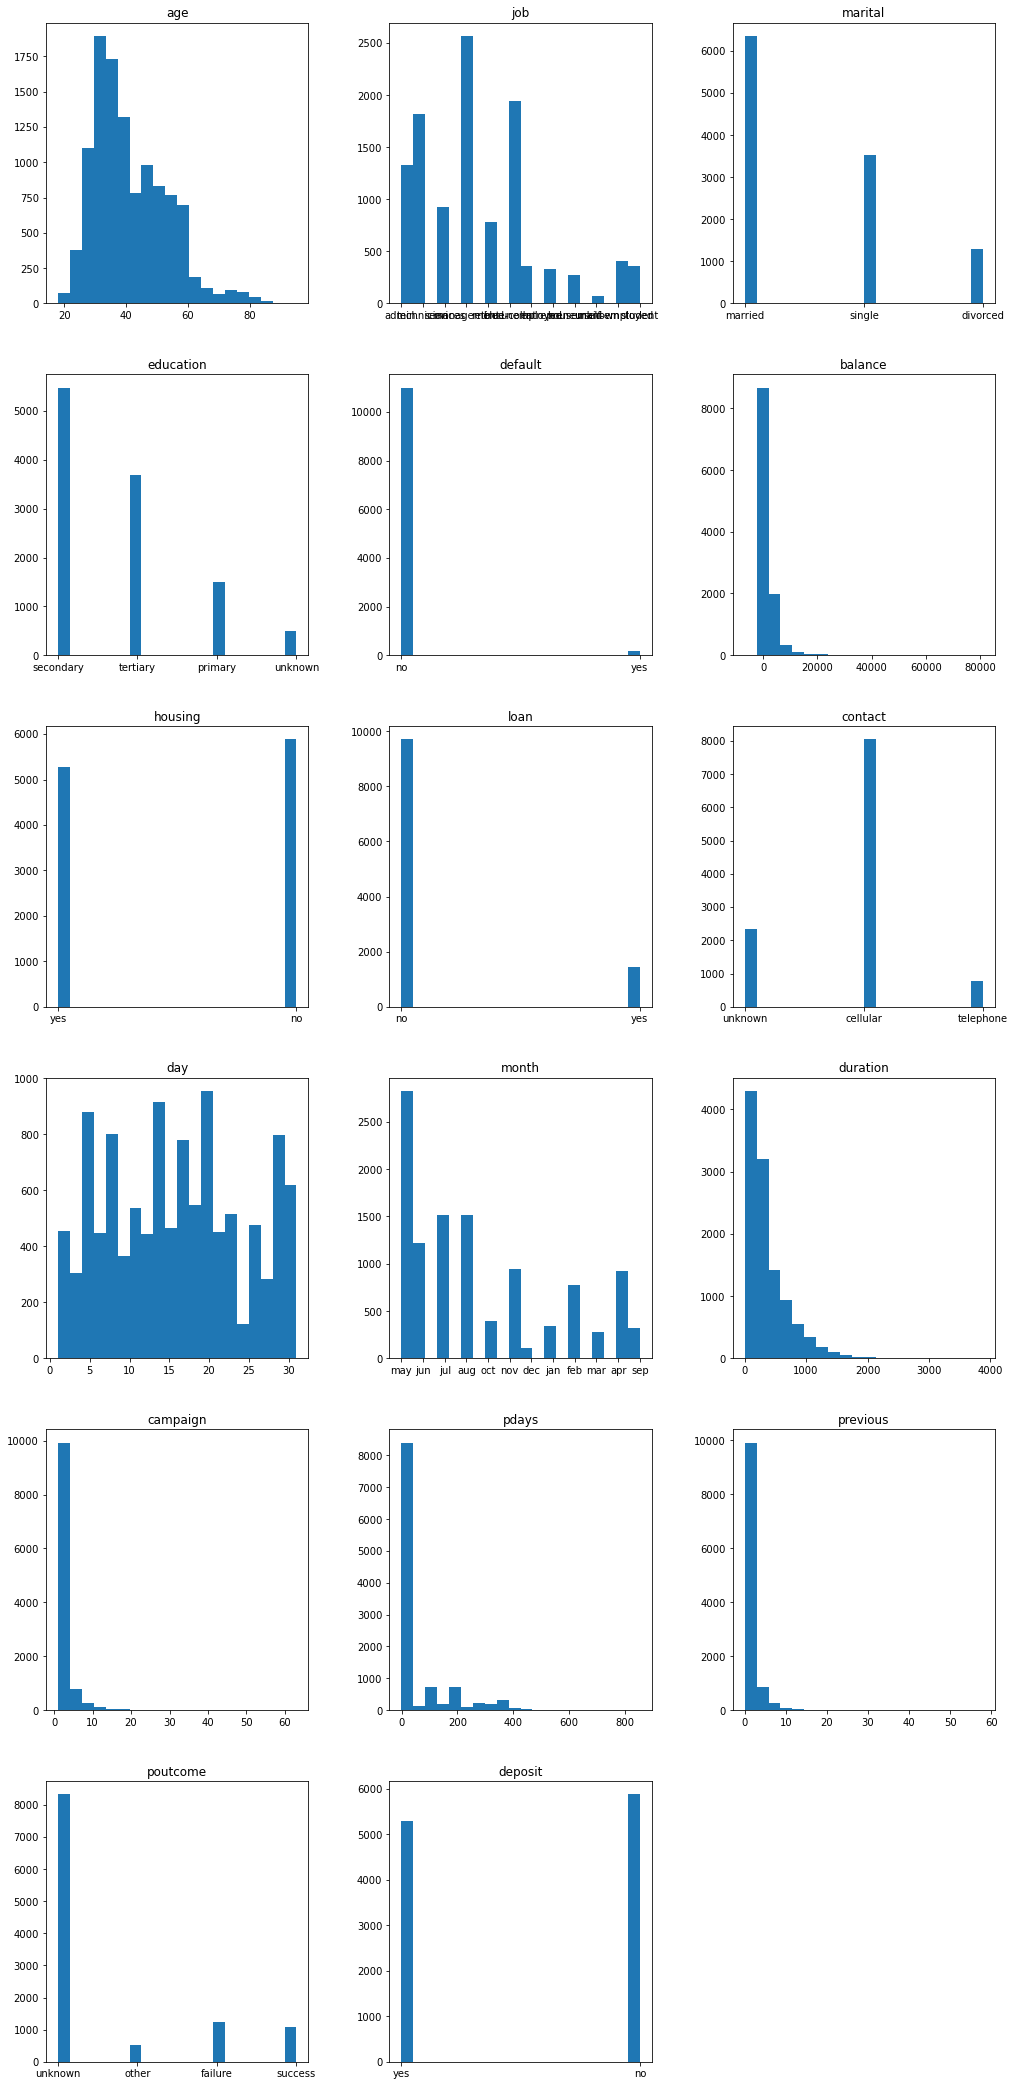

In [142]:
# 绘制df的直方图
import matplotlib.pyplot as plt

# 设置子图布局
num_cols = df.shape[1]  # 数据列数
num_rows = (num_cols - 1) // 3 + 1  # 计算子图行数

# 创建子图
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5)  # 调整子图之间的间距

# 绘制数据分布
for i, col in enumerate(df.columns):
    ax = axs[i // 3, i % 3]  # 获取当前子图
    ax.hist(df[col], bins=20)  # 绘制直方图
    ax.set_title(col)  # 设置子图标题

# 如果数据列数不是3的倍数，最后一行的空白子图去除
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axs[num_rows-1, j])

plt.show()  # 显示图形

In [16]:
x_prepared = pd.get_dummies(x_prepared.copy()) # 处理类别变量

x_prepared # 查看编码后结果

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [17]:
lbe =  LabelEncoder()
lbe.fit(y)
y = lbe.transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

## 对特征做归一化

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['age', 'day', 'balance', 'duration', 'campaign', 'pdays', 'previous']
x_prepared[numeric_columns] = scaler.fit_transform(x_prepared[numeric_columns])
x_prepared

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## 对特征做特征工程

In [19]:
from sklearn.decomposition import PCA

# 创建PCA对象，选择前40个主成分
pca = PCA(n_components=40)

# 提取主成分
# PCA是无监督机器学习算法，不需要提供目标变量
x_prepared_last = pca.fit_transform(x_prepared)

##  再次进行模型的训练与评估

In [24]:
# 训练SVC模型
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_prepared_last, y, train_size=0.8, test_size=1-0.8, random_state=0)
svc_model = SVC(random_state=0, probability=True)
svc_model.fit(x_train2, y_train2)
y_pred2 = svc_model.predict(x_test2)
svc_score2 = accuracy_score(y_test2, y_pred2)
print('svc accuracy:', svc_score2)

svc accuracy: 0.8468428123600538


In [25]:
# 训练LR模型
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, max_iter=10000)
lr_model.fit(x_train2, y_train2)
y_pred2 = lr_model.predict(x_test2)
lr_score2 = accuracy_score(y_test2, y_pred2)
print('lr accuracy:', lr_score2)

lr accuracy: 0.825794894760412


##  检查点：数据准备过程带来的提升

In [29]:
print('improvement of svc:', (svc_score2 - svc_simple_score) / svc_simple_score)
print('improvement of lr:', (lr_score2 - lr_simple_score) / lr_simple_score)

improvement of svc: 0.15094339622641517
improvement of lr: 0.007650273224043756


# 2. 模型的训练与评估
**实验要求：在不改变数据的前提下，依次调用[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)、[LR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)、[RF](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)、[XGBoost](https://xgboost.readthedocs.io/en/stable/tutorials/index.html)及[LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/)算法，对比不同算法在本数据集上的性能差异，并分析原因**

In [30]:
from sklearn.metrics import accuracy_score

# 划分train，test数据集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_simple_prepared, y, train_size=0.8, test_size=1-0.8, random_state=0)

In [31]:
# 训练SVC模型
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
svc_model = SVC(random_state=0, probability=True)
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
svc_score = accuracy_score(y_test, y_pred)
print('svc accuracy:', svc_score)

svc accuracy: 0.7357814599193909


In [32]:
# 训练LR模型
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, max_iter=10000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
lr_score = accuracy_score(y_test, y_pred)
print('lr accuracy:', lr_score)

lr accuracy: 0.819525302283923


In [33]:
# 训练RF模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
rf_score = accuracy_score(y_test, y_pred)
print('rf accuracy:', rf_score)

rf accuracy: 0.819525302283923


In [34]:
# 训练XGBoost模型
import xgboost as xgb 
from sklearn.metrics import accuracy_score

# 转换数据集为DMatrix格式
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# 设置模型参数
params = {
    'objective': 'multi:softmax',  # 多分类问题
    'num_class': 3,  # 类别数量
    'max_depth': 3,  # 树的最大深度
    'eta': 0.1,  # 学习率
    'seed': 42  # 随机种子
}

# 训练模型
num_rounds = 100  # 迭代次数
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上进行预测
y_pred = model.predict(dtest)

# 将预测结果转换为整数类型
y_pred = y_pred.astype(int)

# 计算准确率
xgb_score= accuracy_score(y_test, y_pred)
print("xgboost accuracy:", xgb_score)

xgboost accuracy: 0.8347514554411106


In [35]:
# 训练LightGBM模型
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# 将数据集转换为LightGBM的数据格式
train_data = lgb.Dataset(x_train, label=y_train)

# 设置模型参数
params = {
    'objective': 'multiclass',  # 多分类问题
    'num_class': 3,  # 类别数量
    'max_depth': 3,  # 树的最大深度
    'learning_rate': 0.1,  # 学习率
    'seed': 42,  # 随机种子
    'verbose': -1
}

# 训练模型
num_rounds = 100  # 迭代次数
model = lgb.train(params, train_data, num_rounds)

# 在测试集上进行预测
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)  # 取概率最大的类别作为预测结果

# 计算准确率
lightgbm_score = accuracy_score(y_test, y_pred)
print("lightgbm_accuracy:", lightgbm_score)

lightgbm_accuracy: 0.8396775638154949


## 不同模型性能对比

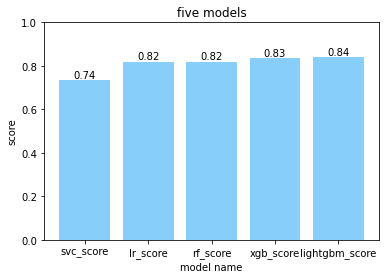

In [109]:
import matplotlib.pyplot as plt

# 五个数据点
data = [0,0,0,0,0]
data[0] = svc_score
data[1] = lr_score
data[2] = rf_score
data[3] = xgb_score
data[4] = lightgbm_score

# x轴的取值范围和标签
x = ['svc_score', 'lr_score', 'rf_score', 'xgb_score', 'lightgbm_score']

# 创建柱状图
plt.bar(x, data, color='#87CEFA')


# 设置y轴范围为0到1
plt.ylim(0, 1)

# 添加每个柱子的数值标签（保留两位小数）
for i, d in enumerate(data):
    label = '{:.2f}'.format(d)  # 保留两位小数
    plt.text(i, d, label, ha='center', va='bottom')

# 添加标题和轴标签
plt.title("five models")
plt.xlabel("model name")
plt.ylabel("score")

# 显示图形
plt.show()

分析：
R、RF、XGBoost、LightGBM的性能较为接近，在0.83上下，而SVC的性能相对来说差一点，只有0.74

# 3. 实现一个LR分类器

**实验要求：仅基于3个包实现一个简单的LR分类器，并与`sklearn`中`LR`分类器的性能越接近越好**

## 步骤1：确定优化目标

$$\hat p(X_i) = \frac{1}{1+\exp({- X_i^TW)}}$$
$$loss = C \sum_{i=1}^{n}(-y_i \log{\hat p(X_i)} - (1-y_i)\log{(1-\hat p(X_i))})+r(W)$$
$$r(W)=\frac{1}{2}\lVert \mathbf{w}\rVert^{2}$$

* 注意：常数项$b$已经放入权重向量$\mathbf{w}$中，因此$X$中应该加入新的一列，内容为全`1`
* 参考[stanford Logistic Regression](https://web.stanford.edu/~jurafsky/slp3/5.pdf)

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
def get_loss_easy(W, x, y, C):
    # write your code here
    X = np.array(x)  # 将特征矩阵转换为NumPy数组
    n = len(y)
    z = np.dot(X, W)
    p = 1 / (1 + np.exp(-z))
    loss = C * np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)) + 0.5 * np.linalg.norm(W)**2
    return loss

## 检查点1:计算loss并检查结果正确性

In [3]:
x_tmp = pd.DataFrame({
    'a':[1,1],
    'b':[1,0.5]
})
y_tmp = np.array([1, 0])
W = np.ones(x_tmp.shape[1])
loss = get_loss_easy(W, x_tmp, y_tmp, C=1)
print('loss: ', loss)

loss:  2.828341289025725


## 步骤2：计算优化目标的梯度
请根据上述目标计算梯度，并将梯度公式填写如下

$$\nabla_{\mathbf{w}}{J(\mathbf{w})}=C·X^T(\hat p(X_i) - y) + W$$

请根据给出的公式，填写梯度函数

In [4]:
def get_gradient_easy(W, x_batch, y_batch, C):
    # write your code here
    n = len(y_batch)
    X = x_batch
    z = np.dot(X, W)
    p = 1 / (1 + np.exp(-z))
    # 计算梯度
    grad = C * np.dot(X.T, p - y_batch)/n + W
    return grad

## 检查点2: 计算gradient并检查正确性

In [5]:
x_tmp = pd.DataFrame({
    'a':[1,1],
    'b':[1,0.5]
})
y_tmp = np.array([1, 0])
W = np.ones(x_tmp.shape[1])
gradient = get_gradient_easy(W, x_tmp, y_tmp, C=1)
print('gradient: ', gradient)

gradient:  [1.34918578 1.14479216]


## 步骤3: 使用平滑技术
请在代码中使用平滑技术以解决零概率问题
- 参考文献：[A survey of smoothing techniques for ME models](https://ieeexplore.ieee.org/document/817452)

In [6]:
def get_loss(W, x, y, C):
    # finish your code here
    x = np.array(x)  # 将特征矩阵转换为NumPy数组
    n = len(y)
    X = np.concatenate((np.ones((n, 1)), x), axis=1)  # 添加全1列到特征矩阵中
    z = np.dot(X, W)
    p = 1 / (1 + np.exp(-z))
    
    # 使用模糊最大熵平滑
    p_smoothed = (p + 0.5) / 2

    loss = -np.sum(y * np.log(p_smoothed) + (1 - y) * np.log(1 - p_smoothed)) * C / n + 0.5 * np.sum(W ** 2)
    return loss

In [36]:
def get_gradient(W, x, y, C):
    # finish your code here
    n = len(y)
    X = np.concatenate((np.ones((n, 1)), x), axis=1)  # 添加全1列到特征矩阵中
    z = np.dot(X, W)
    p = 1 / (1 + np.exp(-z))
    # 使用模糊最大熵平滑
    p_smoothed = (p + 0.5) / 2

    # 计算梯度
    grad = C * np.dot(X.T, p_smoothed - y) / n +  W
    return gradient

## 步骤4：使用随机梯度下降（SGD）进行优化
实现小批量随机梯度下降mini-batch stochastic gradient descent，引入Adam优化器，并加以其他必要的改进,使用实现的函数训练一个LR分类器，并且使用sklearn内置的包进行准确度的测评,减小自己实现的SGD和sklearn的损失差异。
- 参考文献：[Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sgd(
    gradient, x, y, learn_rate=0.1, batch_size=1, n_iter=50,
    tolerance=1e-06, dtype="float64", random_state=None
):
    n = len(y)
    x = np.concatenate((np.ones((n, 1)), x), axis=1)  # 添加全1列到特征矩阵中
    n_samples = x.shape[0]
    n_features = x.shape[1]
    n_batches = n_samples // batch_size
    
    if random_state:
        np.random.seed(random_state)
    
    W = np.zeros(n_features, dtype=dtype)  # 初始化权重向量为零向量
    m = np.zeros(n_features, dtype=dtype)  # Adam优化器的一阶矩估计（梯度的移动平均值）
    v = np.zeros(n_features, dtype=dtype)  # Adam优化器的二阶矩估计（梯度平方的移动平均值）
    beta1 = 0.9  # Adam优化器的一阶矩估计的衰减率
    beta2 = 0.999  # Adam优化器的二阶矩估计的衰减率
    epsilon = 1e-8  # 防止除零的小值
    t = 0  # 计数器
    
    for epoch in range(n_iter):
        indices = np.random.permutation(n_samples) # 随机打乱索引顺序
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for batch in range(n_batches):
            start = batch * batch_size # 当前批次的起始索引
            end = (batch + 1) * batch_size  # 当前批次的结束索引
            x_batch = x_shuffled[start:end] # 当前批次的特征子矩阵
            y_batch = y_shuffled[start:end] # 当前批次的目标变量子向量
            
            gradient_val = gradient(W, x_batch, y_batch, 1) # 计算当前批次的梯度
            
            t += 1
            m = beta1 * m + (1 - beta1) * gradient_val
            v = beta2 * v + (1 - beta2) * np.square(gradient_val)  # 更新二阶矩估计
            m_hat = m / (1 - np.power(beta1, t)) # 修正一阶矩估计的偏差
            v_hat = v / (1 - np.power(beta2, t)) # 修正二阶矩估计的偏差
            W -= learn_rate * m_hat / (np.sqrt(v_hat) + epsilon) # 更新权重向量
        
        if np.linalg.norm(gradient(W, x_batch, y_batch)) < tolerance: # 判断梯度范数是否小于容差值，判断收敛性
            break
    
    return W

# 计算损失函数的梯度

def get_gradient(W, x_batch, y_batch, C):
    n = len(y_batch)
    z = np.dot(x_batch, W)
    p = sigmoid(z)
    gradient = C * np.dot(x_batch.T, p - y_batch) / n

    return gradient

# 训练逻辑回归分类器
def train_LR(x, y, learn_rate=0.1, batch_size=1, n_iter=50, tolerance=1e-06, random_state=None):
    W = sgd(get_gradient, x, y, learn_rate, batch_size, n_iter, tolerance, random_state=random_state)
    return W

# 预测函数
def predict_LR(W, x):
    n = x.shape[0]
    X = np.concatenate((np.ones((n, 1)), x), axis=1)
    z = np.dot(X, W)
    p = sigmoid(z)
    y_pred = np.round(p)
    return y_pred


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_simple_prepared, y, train_size=0.8, test_size=1-0.8, random_state=0)
# 训练一个LR分类器
W = train_LR(x_train, y_train, learn_rate=0.1, batch_size=16, n_iter=100)
y_pre_train = predict_LR(W, x_train) 
y_pre_test = predict_LR(W, x_test)
print('train accuracy: ',accuracy_score(y_train, y_pre_train))
print('test accuracy: ',accuracy_score(y_test, y_pre_test))

C:\Users\Rachel\AppData\Local\Temp\ipykernel_6968\602663546.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


train accuracy:  0.8198006495688207
test accuracy:  0.8137035378414689


In [70]:
# 请在此处补充预测和评测代码
# 训练LR模型
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr_model2 = LogisticRegression(random_state=0, max_iter=10000)
lr_model2.fit(x_train, y_train)
y_pre_train2 = lr_model2.predict(x_train) 
y_pre_test2 = lr_model2.predict(x_test)

print('my train accuracy: ',accuracy_score(y_train, y_pre_train))
print('my test accuracy: ',accuracy_score(y_test, y_pre_test))
print("-------------------------------------------")
print('standard train accuracy: ',accuracy_score(y_train, y_pre_train2))
print('standard test accuracy: ',accuracy_score(y_test, y_pre_test2))
print("\n")
print("difference of train accuracy: ", abs(accuracy_score(y_train, y_pre_train) - accuracy_score(y_train, y_pre_train2)) )
print("difference of test accuracy: ", abs(accuracy_score(y_test, y_pre_test) - accuracy_score(y_test, y_pre_test2)) )


my train accuracy:  0.8198006495688207
my test accuracy:  0.8137035378414689
-------------------------------------------
standard train accuracy:  0.8295441818792698
standard test accuracy:  0.819525302283923


difference of train accuracy:  0.00974353231044911
difference of test accuracy:  0.00582176444245408
